### Data Analytics Assignment Upliance.ai
- The objective of this assignment is to analyze datasets related to user behavior,
cooking preferences, and order trends.

In [26]:
## import neccesary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid",{'grid.linestyle': '--'})

import warnings
warnings.filterwarnings("ignore")

##### Data Understanding and Cleaning

In [13]:
## load the data
user_details=pd.read_excel('Assignment.xlsx',sheet_name='UserDetails.csv')
user_details

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


In [15]:
cooking_sessions=pd.read_excel('Assignment.xlsx',sheet_name='CookingSessions.csv')
cooking_sessions

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1


In [16]:
order_details=pd.read_excel('Assignment.xlsx',sheet_name='OrderDetails.csv')
order_details

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010


In [17]:
### check the shape of each dataset
print(user_details.shape)

print("-------------------------")

print(cooking_sessions.shape)

print("-------------------------")

print(order_details.shape)

(10, 9)
-------------------------
(16, 8)
-------------------------
(16, 10)


In [18]:
## check datatypes of each dataset
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes


In [19]:
cooking_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [20]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


- Rating column in Order Details dataset has 2 missing values.

In [ ]:
## impute missing values using mean imputation technique
order_details['Rating']=round(order_details['Rating'].fillna(order_details['Rating'].mean()),1)

In [30]:
### merge cooking sessions with order details using session id
merged_df=pd.merge(cooking_sessions,order_details, on='Session ID', how='inner')
merged_df

,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.3
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.3
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0


In [31]:
## remove repeated columns
merged_df.drop(['User ID_y','Meal Type_y','Dish Name_y'],axis=1, inplace=True)

In [33]:
## rename columns
merged_df.rename(columns={'User ID_x':'User ID','Dish Name_x':'Dish Name','Meal Type_x':'Meal Type'},inplace=True)
merged_df

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,2024-12-02,Canceled,12.5,Night,4.3
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,2024-12-03,Completed,9.0,Day,4.0
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,2024-12-03,Completed,14.0,Night,4.0
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,2024-12-04,Completed,13.5,Night,4.0
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,2024-12-04,Canceled,11.0,Day,4.3
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,2024-12-05,Completed,12.0,Night,5.0
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,2024-12-05,Completed,7.0,Morning,4.0


In [109]:
### lets merge merged_df with user details using user id
df = pd.merge(merged_df,user_details,on='User ID', how='inner')
df

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,...,Time of Day,Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,...,Night,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,...,Day,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,2024-12-02,...,Night,4.3,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,...,Morning,4.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,2024-12-03,...,Day,4.0,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,2024-12-03,...,Night,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,2024-12-04,...,Night,4.0,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,2024-12-04,...,Day,4.3,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,2024-12-05,...,Night,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,2024-12-05,...,Morning,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Session ID         16 non-null     object        
 1   User ID            16 non-null     object        
 2   Dish Name          16 non-null     object        
 3   Meal Type          16 non-null     object        
 4   Session Start      16 non-null     datetime64[ns]
 5   Session End        16 non-null     datetime64[ns]
 6   Duration (mins)    16 non-null     int64         
 7   Session Rating     16 non-null     float64       
 8   Order ID           16 non-null     int64         
 9   Order Date         16 non-null     datetime64[ns]
 10  Order Status       16 non-null     object        
 11  Amount (USD)       16 non-null     float64       
 12  Time of Day        16 non-null     object        
 13  Rating             16 non-null     float64       
 14  User Name   

##### Exploratory Data Analysis

In [ ]:
#calculate total orders per user
orders_per_user = df.groupby("User ID").size()

#frequency of meal types
meal_type_frequency = df["Meal Type"].value_counts()

#favorite dishes
favorite_dishes = df["Dish Name"].value_counts()

In [46]:
print("Orders per User:\n", orders_per_user)
print('----------------------------------------------')
print("Meal Type Frequency:\n", meal_type_frequency)
print('----------------------------------------------')
print("Favorite Dishes:\n", favorite_dishes)

Orders per User:
 User ID
U001    3
U002    3
U003    3
U004    2
U005    2
U006    1
U007    1
U008    1
dtype: int64
----------------------------------------------
Meal Type Frequency:
 Meal Type
Dinner       8
Lunch        5
Breakfast    3
Name: count, dtype: int64
----------------------------------------------
Favorite Dishes:
 Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


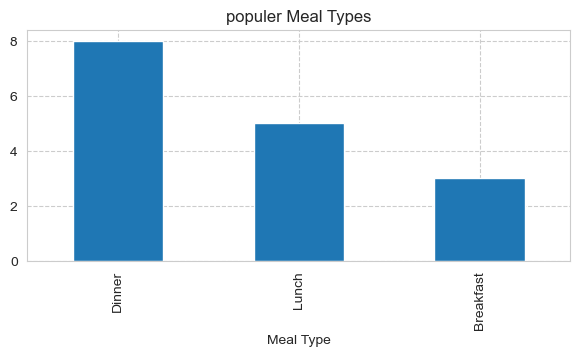

In [122]:
## plot these pattern
plt.figure(figsize=(7,3))
meal_type_frequency.plot(kind='bar')
plt.title('populer Meal Types')
plt.show()

Dinner is the most popular meal type, followed by Lunch, and Breakfast is the least popular.

This trend might suggest that users are more inclined to order food in the evening, possibly after work or during family time.
Breakfast’s lower popularity may indicate it is often skipped or prepared at home rather than ordered.

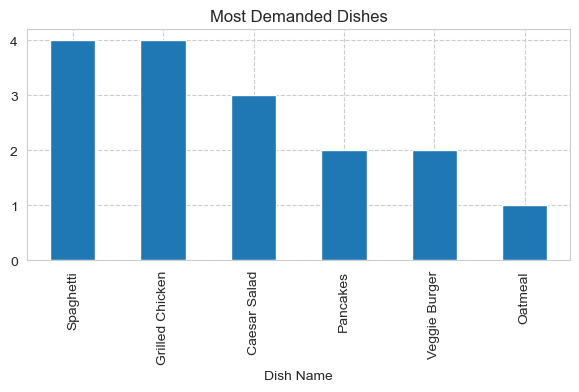

In [56]:
#most demanded dishes
plt.figure(figsize=(7,3))
favorite_dishes.plot(kind='bar')
plt.title('Most Demanded Dishes')
plt.xlabel('Dish Name')
plt.show()

Spaghetti and Grilled Chicken are most demanded dishes among users

In [129]:
#average rating for each dish
average_session_rating = df.groupby("Dish Name")['Session Rating'].mean()
average_session_rating

Dish Name
Caesar Salad       4.366667
Grilled Chicken    4.775000
Oatmeal            4.100000
Pancakes           4.400000
Spaghetti          4.625000
Veggie Burger      4.350000
Name: Session Rating, dtype: float64

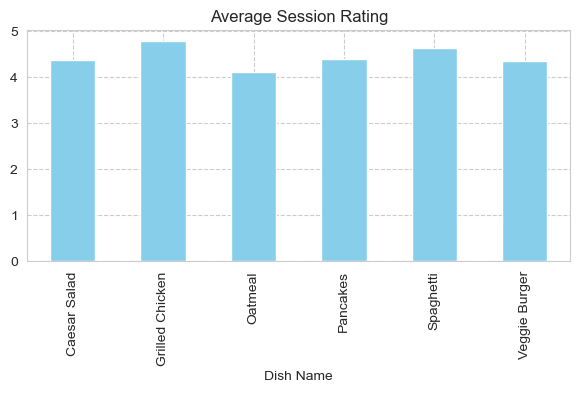

In [130]:
plt.figure(figsize=(7,3))
average_session_rating.plot(kind='bar',color='skyblue')
plt.title('Average Session Rating')
plt.show()

All dishes have high session ratings around 4 and above, indicating overall satisfaction.

Grilled Chicken and Spaghetti are slightly higher-rated, which may reflect their session quality or popularity among users.
No dish has a significantly low rating, suggesting consistent session quality.

In [126]:
##average duration for dishes
average_duration = df.groupby("Dish Name")['Duration (mins)'].mean()
average_duration

Dish Name
Caesar Salad       21.666667
Grilled Chicken    42.500000
Oatmeal            10.000000
Pancakes           30.000000
Spaghetti          35.000000
Veggie Burger      20.000000
Name: Duration (mins), dtype: float64

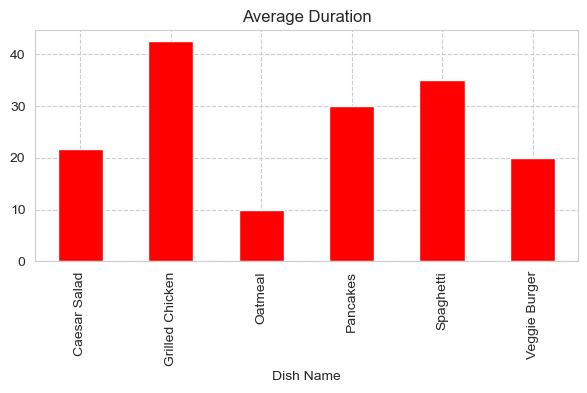

In [127]:
#plot 
plt.figure(figsize=(7,3))
average_duration.plot(kind='bar',color='red')
plt.title('Average Duration')
plt.show()

Grilled Chicken has the longest average session duration: This could indicate that users spend more time interacting with this dish, either due to its preparation process, popularity, or user interest in customizing it.

Oatmeal has the shortest average session duration: This might suggest it is a straightforward dish with less customization or interaction required.

Spaghetti and Pancakes also have significant durations: These dishes may involve more preparation steps or engagement from users compared to others like Caesar Salad or Veggie Burger.

In [156]:
##average session length for meal type
avg_session_duration = df.groupby('Meal Type')['Duration (mins)'].mean()
print(avg_session_duration)

Meal Type
Breakfast    23.333333
Dinner       38.750000
Lunch        21.000000
Name: Duration (mins), dtype: float64


In [157]:
#total spending per user
total_spending = df.groupby('User ID')['Amount (USD)'].sum()
print(total_spending)

User ID
U001    35.0
U002    31.0
U003    32.0
U004    21.5
U005    22.5
U006    13.0
U007    14.0
U008    11.0
Name: Amount (USD), dtype: float64


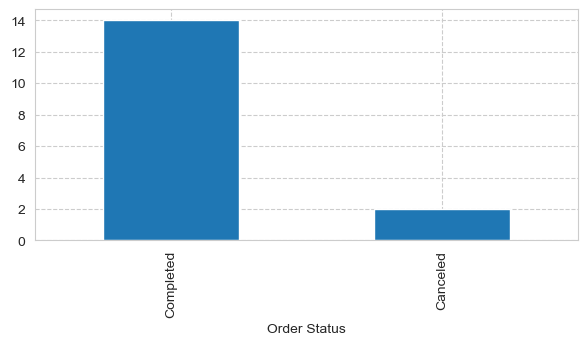

In [96]:
#plot the order status distribution
plt.figure(figsize=(7,3))
order_status_distribution = df['Order Status'].value_counts()
order_status_distribution.plot(kind='bar')
plt.show()

In [133]:
#number of canceled orders
canceled_orders = df[df['Order Status'] == 'Canceled'].shape[0]

#calculate the cancellation rate
cancellation_rate = (canceled_orders / len(df)) * 100
cancellation_rate

12.5

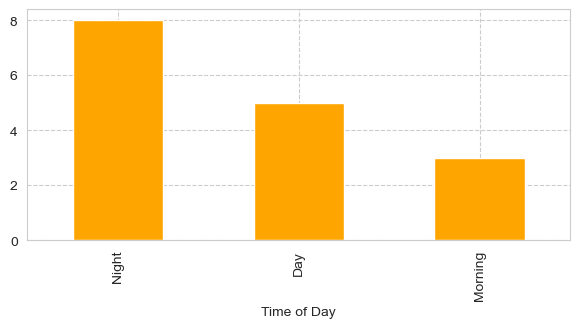

In [ ]:
#check when users are most active
plt.figure(figsize=(7,3))
time_of_day_analysis = df['Time of Day'].value_counts()
time_of_day_analysis.plot(kind='bar', color='orange')
plt.show()

Users are most active at night, suggesting that they likely prefer ordering meals or engaging with the service during dinner or late hours.

This could be driven by convenience after work or leisure activities, as well as dinner being a significant meal for ordering food.

Order Date
2024-12-01    25.0
2024-12-02    20.5
2024-12-03    23.0
2024-12-04    24.5
2024-12-05    19.0
2024-12-06    21.0
2024-12-07    22.0
2024-12-08    25.0
Name: Amount (USD), dtype: float64


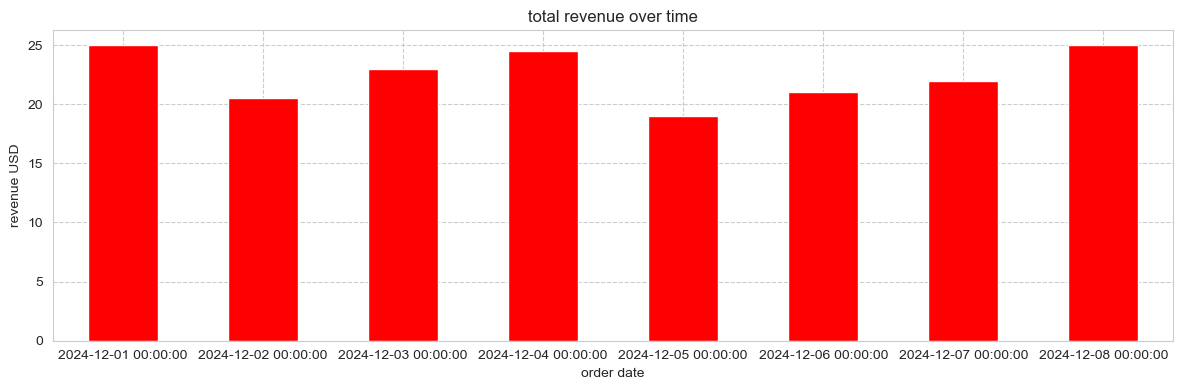

In [ ]:
##group by Order Date and sum the revenue
revenue_over_time = df.groupby('Order Date')['Amount (USD)'].sum()

##plot the revenue over time
plt.figure(figsize=(12, 4))
revenue_over_time.plot(kind='bar', color='red')
plt.title('total revenue over time')
plt.xlabel('order date')
plt.ylabel('revenue USD')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Revenue peaks on December 1st and 8th, while it dips to its lowest point on December 5th.

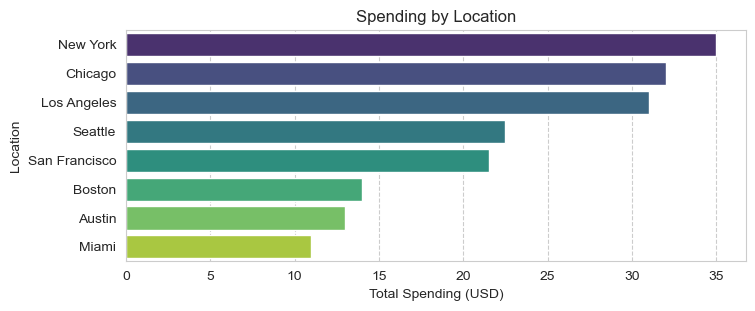

In [162]:
#grouping data by location and sum the amount.
spending_by_location = df.groupby('Location')['Amount (USD)'].sum().reset_index()
spending_by_location = spending_by_location.sort_values(by='Amount (USD)', ascending=False)
plt.figure(figsize=(8, 3))
sns.barplot(x='Amount (USD)', y='Location', data=spending_by_location, palette='viridis')
plt.title('Spending by Location')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Location')
plt.show()


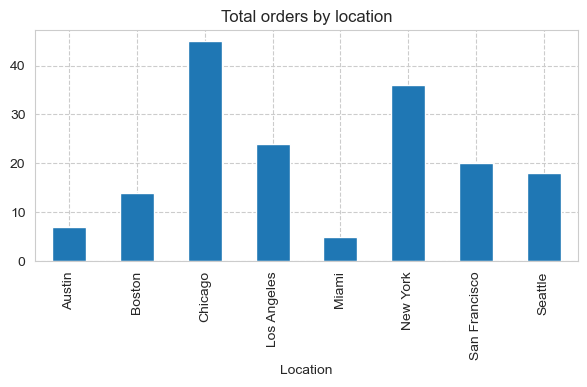

In [143]:
#plot the order count by location
plt.figure(figsize=(7,3))
order_count = df.groupby(['Location'])['Total Orders'].sum()
order_count.plot(kind='bar')
plt.title('Total orders by location')
plt.show()

Chicago has the highest number of orders with over 40. New York and Los Angeles follow with around 35 and 25 orders respectively. 

The remaining cities have less than 20 orders each.

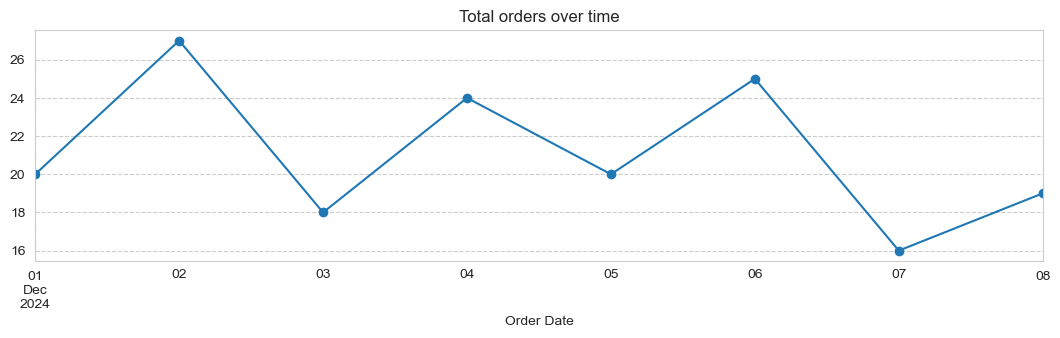

In [154]:
##total orders by day
orders_per_day = df.groupby('Order Date')['Total Orders'].sum()
plt.figure(figsize=(13,3))
orders_per_day.plot(kind='line',marker='o')
plt.title('Total orders over time')
plt.show()

The highest number of orders occurred on December 2nd, with over 25 orders. December 7th saw the lowest number of orders, with around 15.

Overall trend the number of orders fluctuates throughout the period, with some days showing higher activity than others

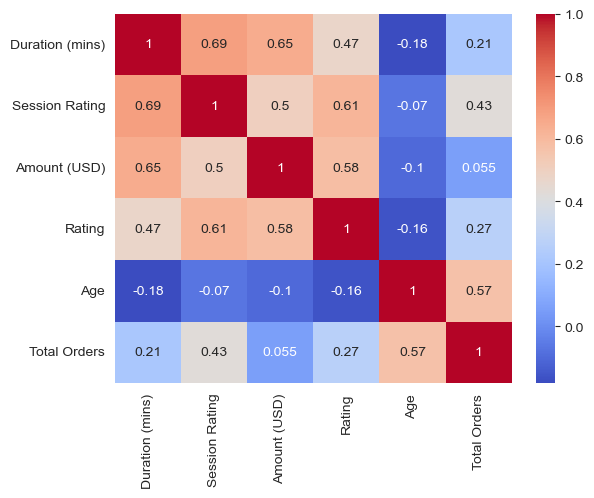

In [120]:
##show correlation between important columns
correlation=df[['Duration (mins)', 'Session Rating','Amount (USD)','Rating','Age','Total Orders']].corr()
correlation_matrix=sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

Duration (mins) and Session Rating: There's a strong positive correlation between these two. This suggests that longer sessions tend to be associated with higher session ratings.

Amount (USD) and Total Orders: A moderate positive correlation exists, indicating that higher amounts spent are often linked to a greater number of total orders.

Age and Total Orders: There's also a moderate positive correlation here, suggesting that older customers tend to place more orders.